In [1]:
import pandas as pd
df = pd.read_csv('titanic3.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [76]:
#We can see that a lot of varaibles will be have to converted to numeric such as the sex variable, 
#also a lot of variables have very different scales. Thus a more unform scale will be needed. 
#And a lot of variables have missing values which will be needed to be dealt with

In [2]:
#split into training and testing
from sklearn.model_selection import train_test_split

train,test =train_test_split(df, test_size=0.4)

In [6]:
train.shape

(786, 14)

In [7]:
test.shape

(524, 14)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 1262 to 393
Data columns (total 14 columns):
pclass       785 non-null float64
survived     785 non-null float64
name         785 non-null object
sex          785 non-null object
age          626 non-null float64
sibsp        785 non-null float64
parch        785 non-null float64
ticket       785 non-null object
fare         785 non-null float64
cabin        177 non-null object
embarked     783 non-null object
boat         303 non-null object
body         73 non-null float64
home.dest    453 non-null object
dtypes: float64(7), object(7)
memory usage: 92.1+ KB


In [75]:
train.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Deck,Age_Class
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,2.279898,0.396947,0.382952,29.615776,0.489822,0.396947,33.193384,0.380407,6.938931,63.451654
std,0.835839,0.489576,0.486416,13.008668,1.060236,0.878731,52.964844,0.641712,2.080871,30.756257
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.000000,0.000000,8.000000,42.000000
50%,3.000000,0.000000,0.000000,29.000000,0.000000,0.000000,14.000000,0.000000,8.000000,62.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,8.000000,87.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.000000,2.000000,8.000000,210.000000


In [ ]:
#40% of the passengers survived and the age ranges from 0 to 80 years old

In [9]:
#Lets look at exactly what columns have missing values

total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
body,713,90.7
cabin,609,77.5
boat,483,61.5
home.dest,333,42.4
age,160,20.4
embarked,3,0.4
fare,1,0.1
ticket,1,0.1
parch,1,0.1
sibsp,1,0.1


In [77]:
#Some of these have a 1/3 missing values which can be dealt with easily,
#but some of them have too many and the entire variable maybe ave to be deleted.

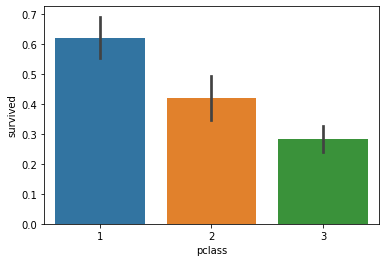

In [79]:
#Lets check out what features will contribute to a high survival rate by producing some visualizations
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
sns.barplot(x='pclass', y='survived', data=train)
#Clearly higher the class, higher the survival rate, so the class seems like a strong indicator of survival.

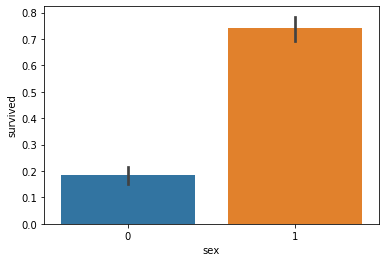

In [80]:
sns.barplot(x='sex', y='survived', data=train)
#Way More females survived than males, hence sex could be a large factor in predicting survival

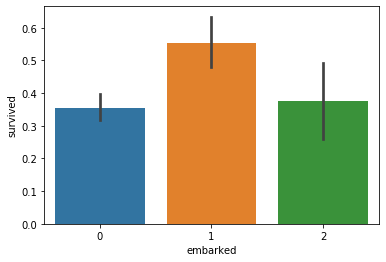

In [81]:
sns.barplot(x='embarked', y='survived', data=train)
#If you embarked at Cherbourg you were more likely to have survived than the other ports such as Southampton
#so this feature would liekley play a large role

#Hence we know that features like sex, class and embarked will need to be kept to get better prediction accuarcy

In [10]:
#Onto the data transformation stage, some of these variables need to be converted into numeric variables for use in ML models

#Lets create a new varaible deck that is extracted from the cabin feature
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['Deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['cabin'], axis=1)
test = test.drop(['cabin'], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [12]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,Deck
1262,3.0,0.0,"van Billiard, Master. James William",male,NaN,1.0,1.0,A/5. 851,14.5000,S,NaN,NaN,NaN,8
243,1.0,0.0,"Rosenshine, Mr. George (""Mr George Thorne"")",male,46.0,0.0,0.0,PC 17585,79.2000,C,NaN,16.0,"New York, NY",8
1010,3.0,0.0,"McNamee, Mr. Neal",male,24.0,1.0,0.0,376566,16.1000,S,NaN,NaN,NaN,8
858,3.0,1.0,"Hee, Mr. Ling",male,NaN,0.0,0.0,1601,56.4958,S,C,NaN,NaN,8
141,1.0,1.0,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,0.0,1.0,PC 17759,63.3583,C,7,NaN,"New York, NY",4


In [13]:
#impute numerical variables with mean
train.fillna(train.mean(), inplace=True)

In [14]:
#Check which values are NaN
print(train.isnull().sum())

pclass         0
survived       0
name           1
sex            1
age            0
sibsp          0
parch          0
ticket         1
fare           0
embarked       3
boat         483
body           0
home.dest    333
Deck           0
dtype: int64


In [15]:
#Turn the sex variable into numeric
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

In [25]:
train.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,body,Deck
1262,3.0,0.0,0.0,29.799521,1.0,1.0,14.5000,0,165.753425,8
243,1.0,0.0,0.0,46.000000,0.0,0.0,79.2000,1,16.000000,8
1010,3.0,0.0,0.0,24.000000,1.0,0.0,16.1000,0,165.753425,8
858,3.0,1.0,0.0,29.799521,0.0,0.0,56.4958,0,165.753425,8
141,1.0,1.0,1.0,45.000000,0.0,1.0,63.3583,1,165.753425,4


In [17]:
#drop the variables name and ticket

train = train.drop(['name'], axis=1)
train = train.drop(['ticket'], axis=1)

In [20]:
train['embarked'].describe()

count     783
unique      3
top         S
freq      553
Name: embarked, dtype: object

In [21]:
#Fill embarked with the most common value
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

In [22]:
# Convert embarked feature into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [24]:
train = train.drop(['boat'], axis=1)
train = train.drop(['home.dest'], axis=1)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 1262 to 393
Data columns (total 10 columns):
pclass      786 non-null int64
survived    786 non-null int64
sex         786 non-null int64
age         786 non-null int64
sibsp       786 non-null float64
parch       786 non-null float64
fare        786 non-null float64
embarked    786 non-null int64
body        786 non-null float64
Deck        786 non-null int64
dtypes: float64(4), int64(6)
memory usage: 67.5 KB


In [27]:
#Convert features from float to ints for ML stage
data = [train, test]

for dataset in data:
    dataset['pclass'] = dataset['pclass'].astype(int)

In [29]:
data = [train, test]

for dataset in data:
    dataset['survived'] = dataset['survived'].astype(int)

In [33]:
print(train.isnull().sum())

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
body        0
Deck        0
dtype: int64


In [32]:
train.fillna(train.mean(), inplace=True)

In [38]:
print(test.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
boat         341
body           0
home.dest    232
Deck           0
dtype: int64


In [37]:
test.fillna(train.mean(), inplace=True)

In [40]:
data = [train, test]

for dataset in data:
    dataset['sex'] = dataset['sex'].astype(int)

In [41]:
data = [train, test]

for dataset in data:
    dataset['age'] = dataset['age'].astype(int)

In [42]:
data = [train, test]

for dataset in data:
    dataset['sibsp'] = dataset['sibsp'].astype(int)

In [43]:
data = [train, test]

for dataset in data:
    dataset['parch'] = dataset['parch'].astype(int)

In [44]:
data = [train, test]

for dataset in data:
    dataset['fare'] = dataset['fare'].astype(int)

In [53]:
#Lets check that all features are ints in both test and train sets
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 825 to 286
Data columns (total 9 columns):
pclass      524 non-null int64
survived    524 non-null int64
sex         524 non-null int64
age         524 non-null int64
sibsp       524 non-null int64
parch       524 non-null int64
fare        524 non-null int64
embarked    524 non-null int64
Deck        524 non-null int64
dtypes: int64(9)
memory usage: 40.9 KB


In [46]:
#Removing uncessary features
train = train.drop(['body'], axis=1)

In [50]:
test = test.drop(['name'], axis=1)
test = test.drop(['ticket'], axis=1)
test = test.drop(['boat'], axis=1)
test = test.drop(['home.dest'], axis=1)

In [52]:
test = test.drop(['body'], axis=1)

In [54]:
print(test.isnull().sum())

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
Deck        0
dtype: int64


In [55]:
print(train.isnull().sum())

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
Deck        0
dtype: int64


In [59]:
test.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Deck,Age_Class
825,3,0,0,9,5,2,46,0,8,27
706,3,0,1,29,1,0,14,1,8,87
1264,3,0,0,40,0,2,14,0,8,120
819,3,1,1,29,0,0,7,2,8,87
1145,3,0,0,8,4,1,29,2,8,24


In [58]:
#Create new variables from existing ones
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['age']* dataset['pclass']

In [60]:
#We are now ready to put our data through machine learning models
X_train = train.drop("survived", axis=1)
Y_train = train["survived"]

In [66]:
X_test  = test.drop("survived", axis=1)

In [67]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,Deck,Age_Class
825,3,0,9,5,2,46,0,8,27
706,3,1,29,1,0,14,1,8,87
1264,3,0,40,0,2,14,0,8,120
819,3,1,29,0,0,7,2,8,87
1145,3,0,8,4,1,29,2,8,24


In [68]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
#Lets check the predictions made on test data of survival or not (0/1)
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

In [73]:
# Lets try another model KNN to compare model performance
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [74]:
#Lets check out what the best model is
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression'],
    'Score': [acc_knn, acc_log]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
83.59,KNN
79.26,Logistic Regression


In [ ]:
#Looks like KNN has a better accuracy in prediction than Logistic Regression